# プログラム18.1

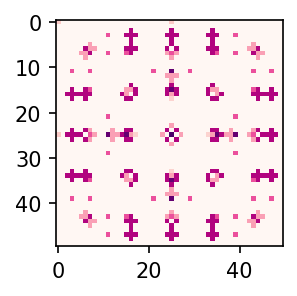

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

# figsizeとnの数値を大きくすればより鮮明なアニメーションになる
fig = plt.figure(figsize = (2, 2), dpi = 150) # 画像の設定
n = 50 # 画像(配列)の大きさ
mod_para = 30 # モデルのパラメータ(配列の要素は0から29)
ims = [] # 描画した画像を一枚一枚保存する入れ物
old_w = np.zeros([n, n]) # n行n列の全の要素が0の行列
# 行番号と列番号の中央の値のみが1の2次元配列
old_w[int(n/2), int(n/2)] = 1 # 初期状態として中心の要素をを1とする(図19.2参照)。ただし、初期状態は任意に設定が可能で、値が変化すると模様も変化します

for t in np.arange(100): # 指定した回数分、遷移の繰り返し
  new_w = np.zeros([n, n]) # 次の状態の入れ物を用意
  for i in np.arange(n): # 行の移動
    for j in np.arange(n): # 列の移動
      # 現在の位置i と j の上下左右の値を加算する
      new_w[i, j] = old_w[i, j] # 中央
      new_w[i, j] += old_w[i - 1, j] # 上の状態
      new_w[i, j] += old_w[(i + 1) % n, j] # 下の状態
      new_w[i, j] += old_w[i, j - 1] # 左の状態
      new_w[i, j] += old_w[i, (j + 1) % n] # 右の状態 
      new_w[i, j] %= mod_para # 剰余を計算
  # 遷移した状態の各要素を使い一枚の画像に変換
  im = plt.imshow(new_w, cmap = 'RdPu', # 色の指定
    interpolation = 'nearest', animated = True) # アニメーションの指定
  ims.append([im]) # imに紐づいている画像一枚を追加して、合計100枚の画像をimsに保存
  old_w = new_w.copy() # 遷移した状態を次のステップで利用するため、遷移により作成した画像(new_w)をold_w にコピーする
# アニメーションの作成 ( ValueError: unknown file extension: .mp4 が発生する場合は補足参照)
ani = ani.ArtistAnimation(fig, # 画像の大きさなどを指定
       ims, # 画像を指定 
       interval = 500, # 画像を切り替えるインターバル 
       blit = True, repeat_delay = 1000)        
# アニメーション (mp4) としてdataフォルダに保存
ani.save('data//ca.mp4', writer = 'ffmpeg')

# プログラム18.2

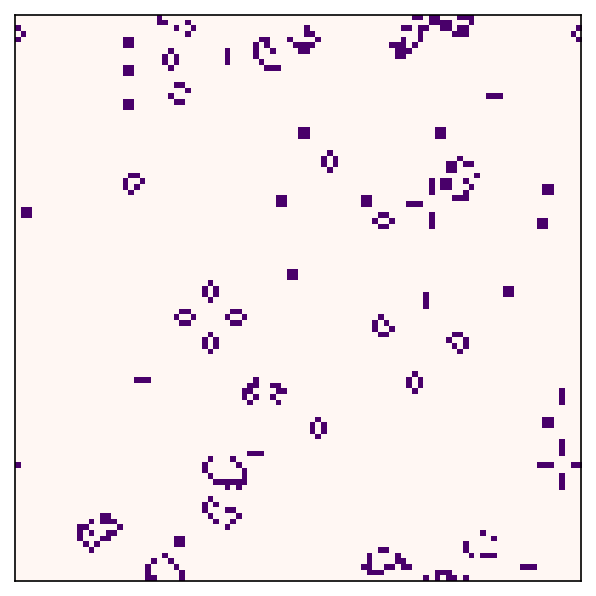

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

fig = plt.figure(figsize = (5, 5), dpi = 150) # 画像の解像度の設定
n = 100 # 画像(配列)の大きさの指定：ライフゲームの世界の大きさ
ims = [] # 描画した画像を一枚一枚保存する入れ物（一枚が一世代に対応）
np.random.seed(0) # 数値 0 を変更してみましょう
# 初期状態の作成: 確率 0.1 で 1、確率 0.9 で 0 を old_w の要素に設定
old_w = np.random.binomial(1, 0.1, (n, n))
plt.tick_params(length = 0, labelbottom = False,labelleft = False) # 枠を非表示に設定

for t in np.arange(100): # 世代交代の回数
    new_w = np.zeros([n, n]) # 次の状態の入れ物を用意
    for i in np.arange(n): # 2次元配列の行の移動
        for j in np.arange(n): # 2次元配列の列の移動
            # 合計 s に 上下左右、左上、右上、左下、右下の値を加算
            s = old_w[i - 1, j] # 上
            s += old_w[(i + 1) % n, j] # 下
            s += old_w[i, j - 1] # 左
            s += old_w[i, (j + 1) % n] # 右
            s += old_w[i - 1, j - 1] # 左上
            s += old_w[i - 1, (j + 1) % n] # 右上
            s += old_w[(i + 1) % n, j - 1] # 左下
            s += old_w[(i + 1) % n, (j + 1) % n] # 右下  
            # 合計 s から old_w[i, j] の生物の次世代での生死を判定
            if old_w[i, j] == 0 and 3 == s: # ルールA
                new_w[i, j] = 1 # 適度な生物数のため、次は誕生
            elif old_w[i, j] == 1 and 2 <= s <= 3: # ルールB
                new_w[i, j] = 1 # 適度な生物数のため、次も生存 
            elif old_w[i, j] == 1 and s <= 1 or 4 <= s: # ルールC
                new_w[i, j] = 0 # 過疎または過密化により次は死亡
    # 一世代分の世代交代（全要素にルールを1度適用）が終了したため描画
    im = plt.imshow(new_w, cmap = 'RdPu', interpolation = 'none', animated = True)
    ims.append([im]) # 画像をimsに保存
    old_w = new_w.copy() # 一つ前の状態として遷移した状態を次のステップで利用する準備
    
ani = ani.ArtistAnimation(fig, ims, interval = 500, blit = True,repeat_delay = 1000)
ani.save('lifegame.mp4', writer = 'ffmpeg')  

# プログラム18.3

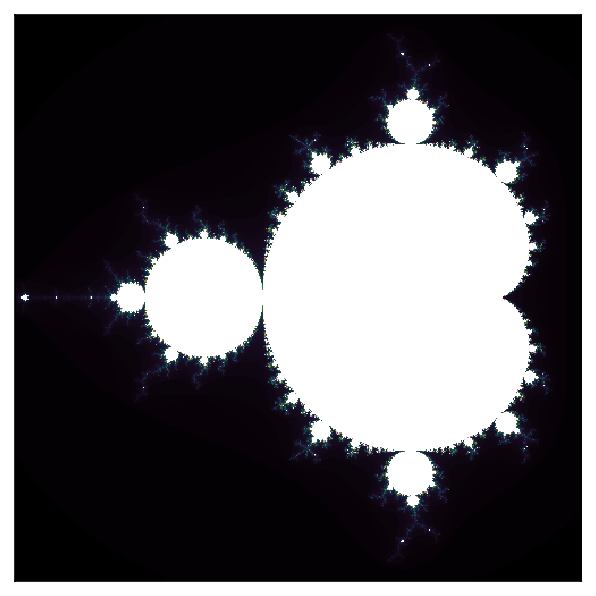

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

fig = plt.figure(figsize = (5, 5), dpi = 150) # 画像の設定
plt.tick_params(length = 0, labelbottom = False, labelleft = False) # 枠を非表示に設定
m = 500 # 画像の細かさ
real = np.linspace(-1.8, 0.6, m) # 横軸に対応
imag = np.linspace(-1.2, 1.2, m) # 縦軸に対応
Z = np.zeros([m, m], dtype = 'complex') # 描画元となる値の計算用

for tate, imag_d in enumerate(imag):
    for yoko, real_d in enumerate(real):
        Z[tate, yoko] = real_d + imag_d * 1j # 複素数に変換
c = Z.copy() # 変数 Z に加える値が変わると模様が変化する

imgd = np.zeros([m, m]) # 描画する値を保存する配列
ims = [] # 描画した画像を一枚一枚保存する入れ物
# マンデルブロウ集合を計算し、その計算結果 Z を参考にしながら描画用の配列imgdを作成
for t in np.arange(1, 201): # 200枚分描画するための繰り返し
    for tate in np.arange(m): # 縦軸分繰り返し
        for yoko in np.arange(m):  # 横軸分繰り返し
            if abs(Z[tate, yoko]) <= 2: # 複素数の絶対値が2以内なら
                Z[tate, yoko] = Z[tate, yoko] ** 2 + c[tate, yoko]
                imgd[tate, yoko] = t # 2を超えるタイミングを代入
                # t の値によって色が変化する
    im = plt.imshow(imgd, cmap = 'cubehelix', interpolation = 'nearest', animated = True) # imgd の代わりに abs(Z) も利用可能
    ims.append([im])# アニメーションに画像を追加

ani = ani.ArtistAnimation(fig, ims, interval = 500, blit = True, repeat_delay = 1000)
ani.save('Mandelbrot_set.mp4', writer = 'ffmpeg')

# プログラム18.4と18.5の修正を加えたもの

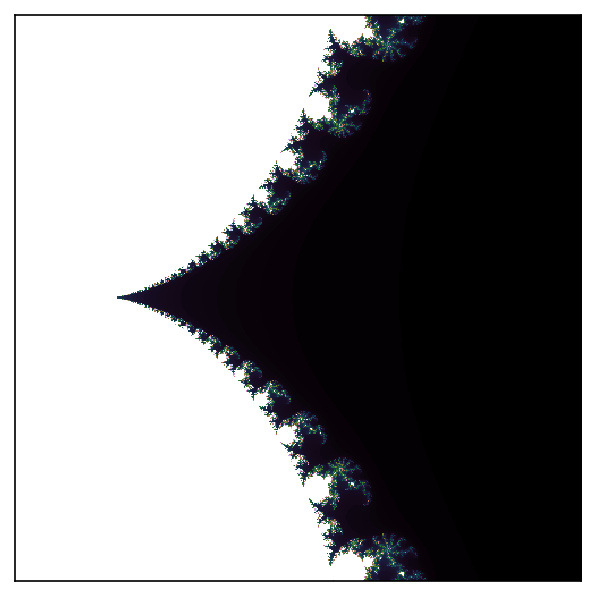

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

fig = plt.figure(figsize = (5, 5), dpi = 150)
plt.tick_params(length = 0, labelbottom = False, labelleft = False)
m = 500
# プログラム18.3からの変更箇所
real = np.linspace(0.2, 0.5, m) # 8行目に対応
imag = np.linspace(-0.15, 0.15, m) # 9行目に対応
Z = np.zeros([m, m], dtype = 'complex')

for tate, imag_d in enumerate(imag):
    for yoko, real_d in enumerate(real):
        Z[tate, yoko] = real_d + imag_d * 1j
c = Z.copy()

imgd = np.zeros([m, m])
ims = [] 

for t in np.arange(1, 201): 
    for tate in np.arange(m): 
        for yoko in np.arange(m):
            if abs(Z[tate, yoko]) <= 2:
                Z[tate, yoko] = Z[tate, yoko] ** 2 + c[tate, yoko]
                imgd[tate, yoko] = t 
                
    im = plt.imshow(imgd, cmap = 'cubehelix', interpolation = 'nearest', animated = True)
    ims.append([im])
    
ani = ani.ArtistAnimation(fig, ims, interval = 500, blit = True, repeat_delay = 1000)
ani.save('Mandelbrot_set2.mp4', writer = 'ffmpeg')

#  プログラム18.3からの変更箇所
fig = plt.figure(figsize = (5, 5), dpi = 150)
plt.tick_params(length = 0, labelbottom = False, labelleft = False)
plt.contourf(real, imag, imgd, cmap = 'cubehelix', levels = 10)
plt.savefig('m2.pdf')

# プログラム18.3を利用して図Cを描画する場合

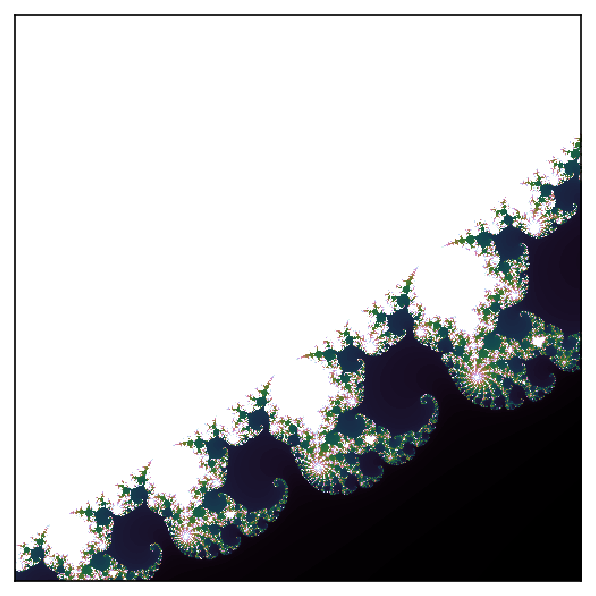

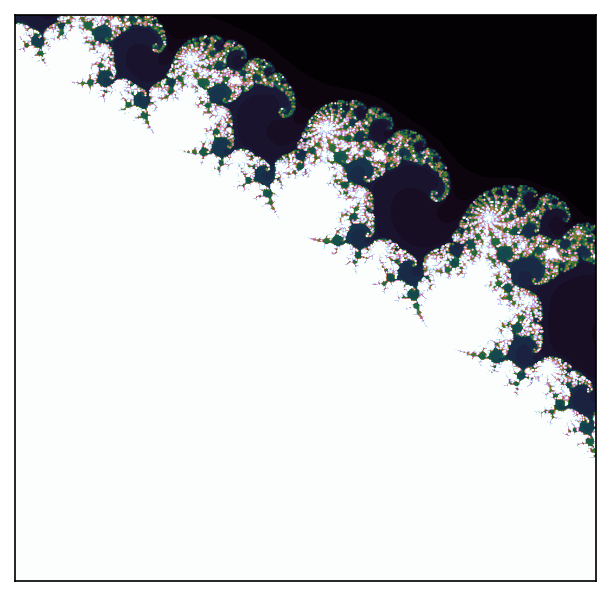

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

fig = plt.figure(figsize = (5, 5), dpi = 150) # 画像の設定
plt.tick_params(length = 0, labelbottom = False, labelleft = False) # 枠を非表示に設定
m = 500 # 画像の細かさ
real = np.linspace(0.28, 0.30, m) # 8行目に対応
imag = np.linspace(-0.03, -0.01, m) # 9行目に対応
Z = np.zeros([m, m], dtype = 'complex') # 描画元となる値の計算用

for tate, imag_d in enumerate(imag):
    for yoko, real_d in enumerate(real):
        Z[tate, yoko] = real_d + imag_d * 1j # 複素数に変換
c = Z.copy() # 変数 Z に加える値が変わると模様が変化する

imgd = np.zeros([m, m]) # 描画する値を保存する配列
ims = [] # 描画した画像を一枚一枚保存する入れ物
# マンデルブロウ集合を計算し、その計算結果 Z を参考にしながら描画用の配列imgdを作成
for t in np.arange(1, 201): # 200枚分描画するための繰り返し
    for tate in np.arange(m): # 縦軸分繰り返し
        for yoko in np.arange(m):  # 横軸分繰り返し
            if abs(Z[tate, yoko]) <= 2: # 複素数の絶対値が2以内なら
                Z[tate, yoko] = Z[tate, yoko] ** 2 + c[tate, yoko]
                imgd[tate, yoko] = t # 2を超えるタイミングを代入
                # t の値によって色が変化する
    im = plt.imshow(imgd, cmap = 'cubehelix', interpolation = 'nearest', animated = True) # imgd の代わりに abs(Z) も利用可能
    ims.append([im])# アニメーションに画像を追加

ani = ani.ArtistAnimation(fig, ims, interval = 500, blit = True, repeat_delay = 1000)
ani.save('Mandelbrot_set3.mp4', writer = 'ffmpeg')

fig = plt.figure(figsize = (5, 5), dpi = 150) 
plt.tick_params(length = 0, labelbottom = False, labelleft = False)
plt.contourf(real, imag, imgd, cmap = 'cubehelix', levels = 50)
plt.savefig('m3.pdf')